# LSTM - word2vec sequence

- **Training set**: LO_SARD102 (95%) (0.75 split)
- **Test/Validation set:** LO_SARD102 (95%) (0.25 split)
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: Class weights

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/home/scheuererra68323/venv37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_full_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_full_train.npy', mmap_mode='r')
print(X_train.shape)
print(Y_train.shape)

classWeights = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_weights_full_train.npy', mmap_mode='r')
print(classWeights)

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_full_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_full_val.npy', mmap_mode='r')
print(X_val.shape)
print(Y_val.shape)

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_X.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_Y.npy',  mmap_mode='r')
print(X_test.shape)
print(Y_test.shape)

train_gen = DataGenerator(_X=X_train, _y=Y_train, batch_size=2048)
val_gen =   DataGenerator(_X=X_val,   _y=Y_val,   batch_size=2048)
test_gen =  DataGenerator(_X=X_test,  _y=Y_test,  batch_size=2048)

(33215, 100, 100)
(33215,)
[ 0.52011416 12.929058  ]
(33215, 100, 100)
(33215,)
(21851, 100, 100)
(21851,)


## Build & train keras model

In [9]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(100, 100), 
                      return_sequences=True))
model.add(layers.Dropout(0.1))
model.add( layers.TimeDistributed(layers.Dense(16)) )
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
             )
history = model.fit_generator(train_gen,
                    epochs=6,
                    verbose=True,
                    validation_data=val_gen,
                    class_weight=classWeights
                   )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 64)           42240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 16)           1040      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1601      
Total params: 44,881
Trainable params: 44,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
17/17 [==============================] - 24s 1s/step - loss: 0.2873 - accuracy: 0.9356 - val_loss: 0.1184 

## Evaluation

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     21243
         1.0       0.00      0.00      0.00       608

    accuracy                           0.96     21851
   macro avg       0.49      0.50      0.49     21851
weighted avg       0.95      0.96      0.95     21851

Confusion matrix:
[[21021   222]
 [  607     1]]

Confusion matrix (Percentages):
[[9.6202e+01 1.0160e+00]
 [2.7780e+00 5.0000e-03]]

Metrics:
Sensitivity (TPR): 0.001645
Specifity (TNR):   0.989549

FPR: 0.010451
FNR: 0.998355

Balanced accuracy: 0.495597

Test loss:	0.185384
Test accuracy:	0.962061


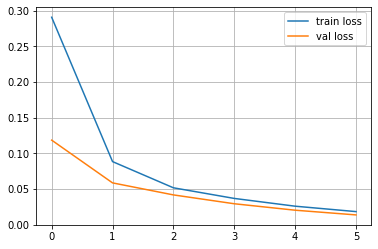

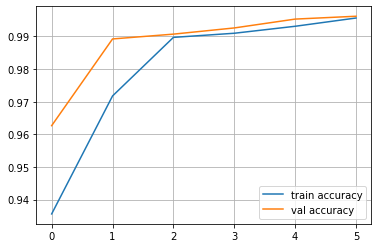

In [10]:
Y_pred = numpy.round(model.predict_generator(test_gen))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate_generator(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [11]:
model.save('testJTT_LSTM_word2vec_weightedClasses.h5')

## Discussion
...

In [3]:
# model.load_weights('testJTT_LSTM_word2vec_weightedClasses.h5')